In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census ##

In [6]:
full = Table.read_table('nc-est2021-agesex-res.csv')
full

SEX,AGE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021
0,0,3733173,3699196,3564493
0,1,3775586,3762475,3702936
0,2,3871739,3852130,3767428
0,3,3964565,3931443,3856743
0,4,4047488,4035968,3935738
0,5,4076067,4072698,4040153
0,6,4046735,4060909,4076629
0,7,4052265,4048019,4064596
0,8,4071358,4055165,4051555
0,9,4112302,4100071,4058615


In [7]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'ESTIMATESBASE2020', 'POPESTIMATE2021')

# Make things easier to read
simple = partial.relabeled(2, '2020').relabeled(3, '2021')

# Remove the age totals
no_999 = simple.where('AGE', are.below(999))

# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')

everyone

AGE,2020,2021
0,3733173,3564493
1,3775586,3702936
2,3871739,3767428
3,3964565,3856743
4,4047488,3935738
5,4076067,4040153
6,4046735,4076629
7,4052265,4064596
8,4071358,4051555
9,4112302,4058615


## Line Plots ##

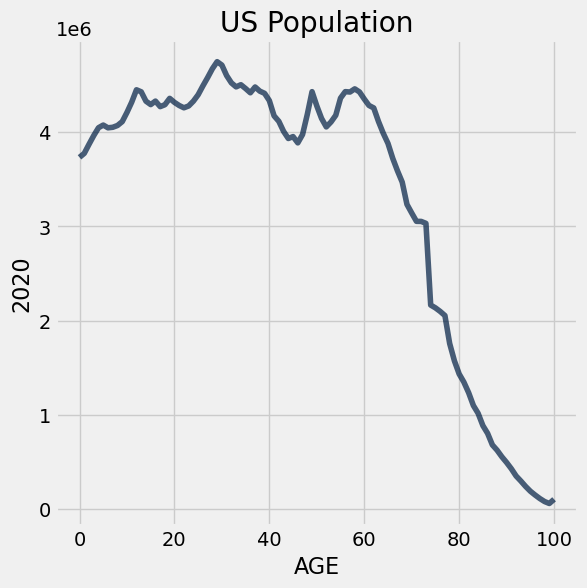

In [18]:
everyone.plot('AGE', '2020')
plots.title('US Population');

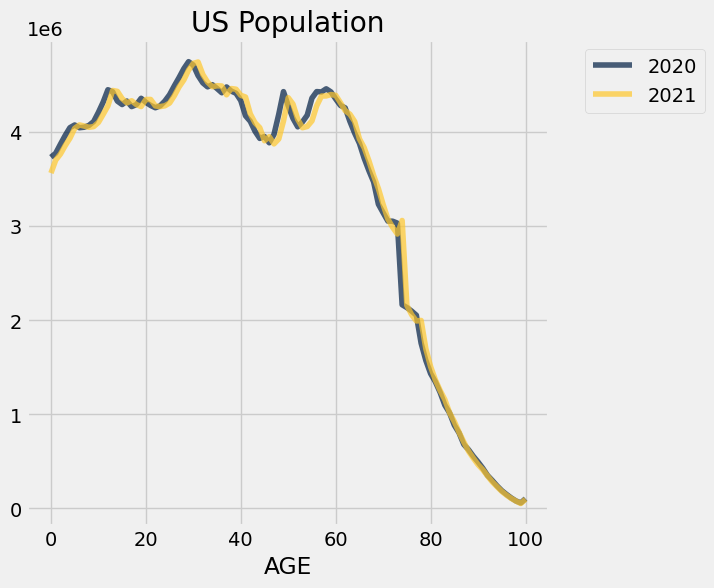

In [21]:
everyone.plot('AGE') #plot age on x and everything else on y
plots.title('US Population');

## What proportion of each age group were female in 2020?

In [24]:
us_pop = no_999.where('SEX', 0).drop('SEX', '2021')
us_pop

AGE,2020
0,3733173
1,3775586
2,3871739
3,3964565
4,4047488
5,4076067
6,4046735
7,4052265
8,4071358
9,4112302


In [27]:
female_pop_2020 = no_999.where(
    'SEX', 2).drop(
    'SEX', '2021').relabeled(
    '2020', 'female_2020')
female_pop_2020

AGE,female_2020
0,1825191
1,1846660
2,1891347
3,1935784
4,1978806
5,1994479
6,1973925
7,1982754
8,1985329
9,2003206


In [35]:
female_proportion = Table().with_columns(
    'AGE', us_pop.column('AGE'),
    'female_proportion', female_pop_2020.column('female_2020') / us_pop.column('2020')
)

female_proportion

AGE,female_proportion
0,0.488911
1,0.489106
2,0.488501
3,0.488271
4,0.488897
5,0.489315
6,0.487782
7,0.489295
8,0.487633
9,0.487125


In [36]:
female_proportion = Table().with_columns(
    'AGE', us_pop.column('AGE'),
    'female_proportion', female_pop_2020.column(1) / us_pop.column(1)
)

female_proportion

AGE,female_proportion
0,0.488911
1,0.489106
2,0.488501
3,0.488271
4,0.488897
5,0.489315
6,0.487782
7,0.489295
8,0.487633
9,0.487125


Text(0.5, 1.0, 'Proportion of US Female Population in 2020')

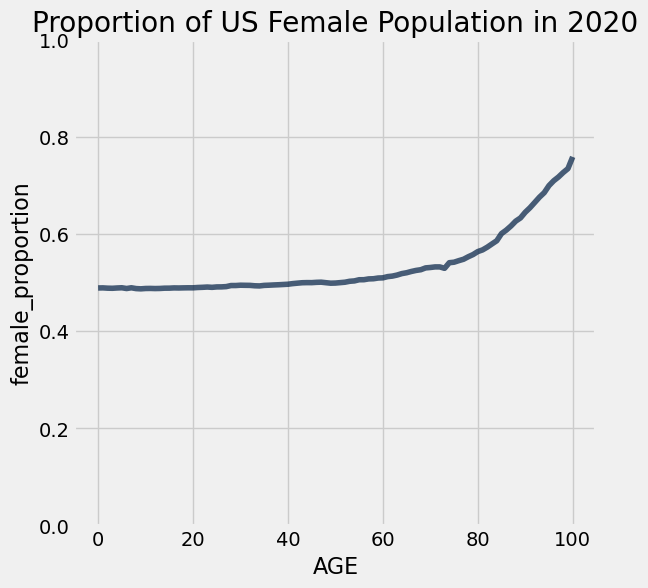

In [43]:
female_proportion.plot('AGE')
plots.ylim(0, 1) #limits for y-axis
plots.title('Proportion of US Female Population in 2020')

## Scatter Plots ##

In [44]:
insurance = Table.read_table('insurance_charges.csv')
insurance

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


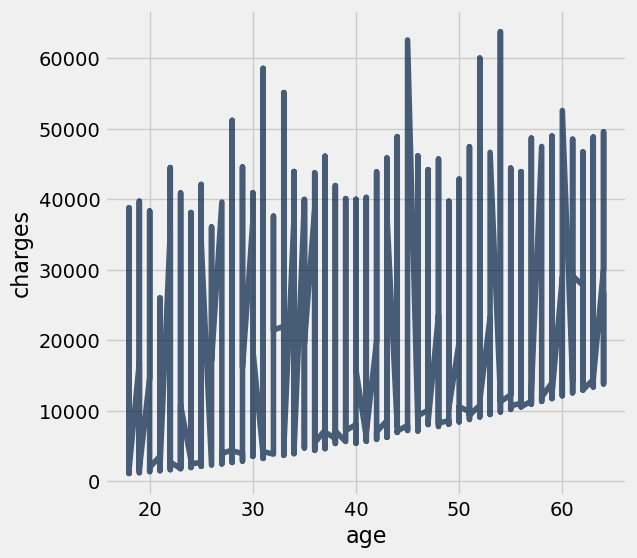

In [47]:
insurance.plot('age', 'charges')

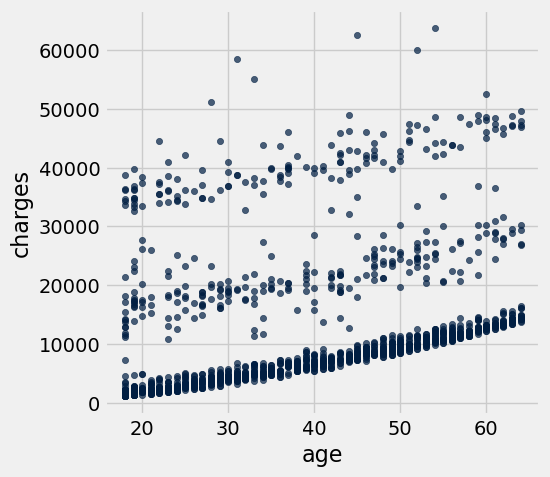

In [48]:
insurance.scatter('age', 'charges')

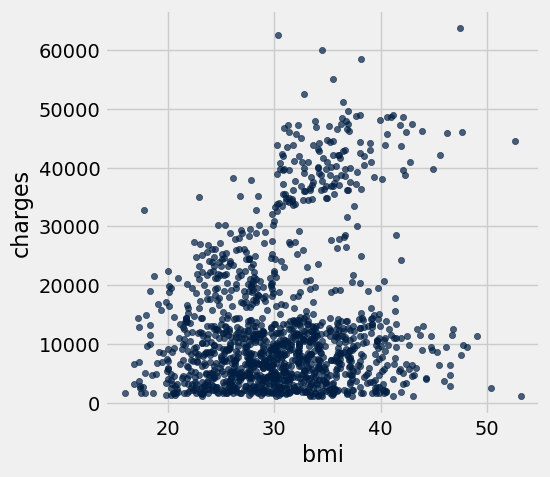

In [50]:
insurance.scatter('bmi', 'charges')

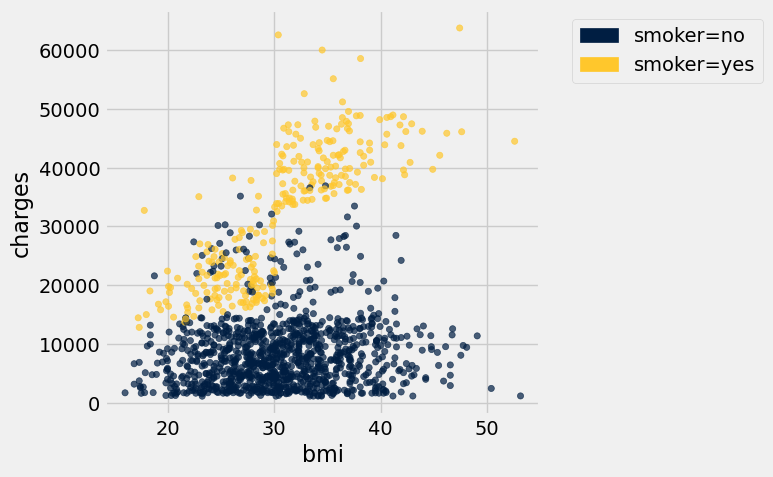

In [52]:
insurance.scatter('bmi', 'charges', group = 'smoker') #pick a binary variable data and groups data with it

- Line Graph: for sequential data (x-asis for time or distance...)
- Scatter plot: for non-sequential data when you're looking for association

## Bar Charts ##

In [53]:
vgsales = Table.read_table('vgsales.csv')
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [57]:
top10_NA_sales = vgsales.sort('NA_Sales', descending = True).take(np.arange(10)) #array from 0-9
top10_NA_sales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


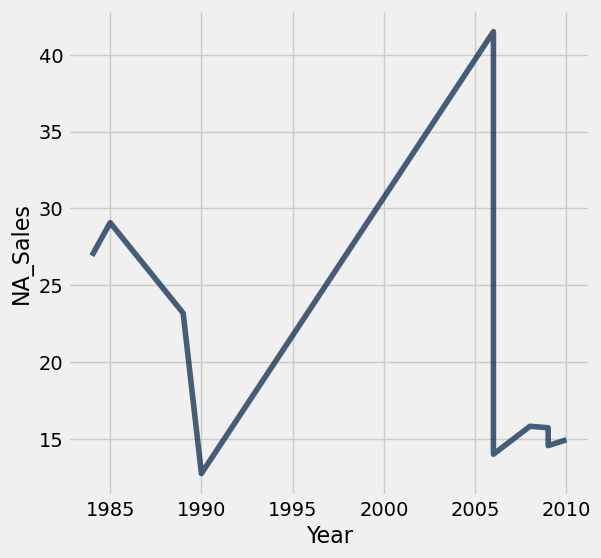

In [58]:
# A line plot doesn't make sense here: don't do this!
top10_NA_sales.plot('Year', 'NA_Sales')

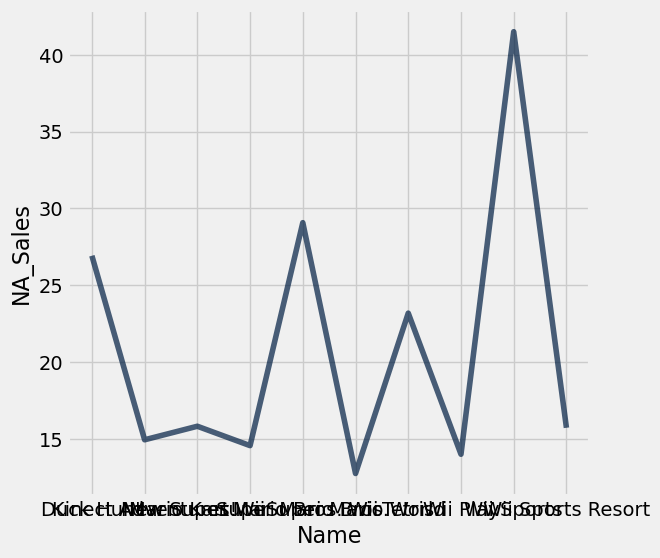

In [59]:
top10_NA_sales.plot('Name', 'NA_Sales')

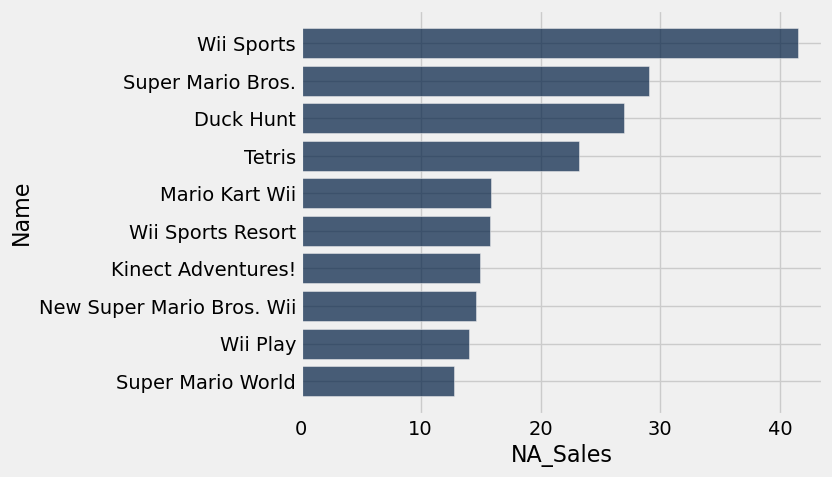

In [60]:
top10_NA_sales.barh('Name', 'NA_Sales')

In [75]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing global sales for Nintendo games

Year_Since_Release = abs(vgsales.column('Year') - 2025)
game_release = vgsales.with_columns('Year Since Release', Year_Since_Release).select(
    'Name', 'Year Since Release').take(np.arange(10))
game_release

Name,Year Since Release
Wii Sports,19
Super Mario Bros.,40
Mario Kart Wii,17
Wii Sports Resort,16
Pokemon Red/Pokemon Blue,29
Tetris,36
New Super Mario Bros.,19
Wii Play,19
New Super Mario Bros. Wii,16
Duck Hunt,41


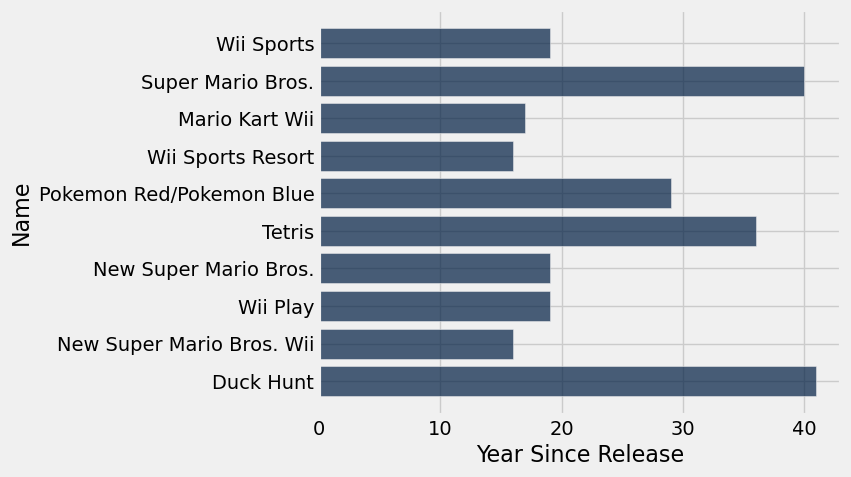

In [77]:
game_release.barh('Name', 'Year Since Release')